In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=100

# Setup

In [3]:
compas_df=pd.read_csv("../Data/compas.csv")

In [4]:
compas_df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [5]:
compas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

# QA

### Nulls
Dropped the 45 nulls in ScoreText; Middle name nulls are fine because not everyone has a middle name.

In [6]:
#Checking what values are possible for scoretext
compas_df.ScoreText.value_counts()

Low       41487
Medium    12488
High       6823
Name: ScoreText, dtype: int64

I know that scoretext is based off of decilescore and it appears that all of these are -1 hence the scoretext being NA. Dropping them since there insignificant & my analysis requires looking at compas model scores.

In [7]:
#compas_df.loc[compas_df['ScoreText'].isnull()].shape ---> To check im indexing right rows, shape should br 45,28
compas_df.loc[compas_df['ScoreText'].isnull()]

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
1837,51351,57821,52534,PRETRIAL,Taffe,Horace,NaN,Male,African-American,11/28/1971,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/18/2013 0:00,2,Medium,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
4033,51986,58599,53245,PRETRIAL,Farr,Clee,NaN,Male,Caucasian,12/22/1995,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,2/8/2013 0:00,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
6603,52760,59586,54136,Probation,Diaz,Jahaira,NaN,Female,Hispanic,1/16/1981,22,Risk and Prescreen,Intake,English,Other,Probation,Single,3/6/2013 0:00,1,Low,7,Risk of Violence,-1.0,-1,NaN,New,1,0
6604,52760,59586,54136,Probation,Diaz,Jahaira,NaN,Female,Hispanic,1/16/1981,22,Risk and Prescreen,Intake,English,Other,Probation,Single,3/6/2013 0:00,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
7173,52910,59783,54307,PRETRIAL,MILLER,MIKHAIL,LEONARD,Male,African-American,10/12/1993,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,3/12/2013 0:00,1,Low,7,Risk of Violence,-1.0,-1,NaN,New,1,0
7174,52910,59783,54307,PRETRIAL,MILLER,MIKHAIL,LEONARD,Male,African-American,10/12/1993,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,3/12/2013 0:00,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
9519,53624,60648,55078,PRETRIAL,SAINTJEAN,GEORGE,NaN,Male,African-American,9/17/1955,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,4/3/2013 0:00,1,Low,7,Risk of Violence,-1.0,-1,NaN,New,1,0
9520,53624,60648,55078,PRETRIAL,SAINTJEAN,GEORGE,NaN,Male,African-American,9/17/1955,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,4/3/2013 0:00,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
10318,53822,60933,55318,PRETRIAL,Rohrs,Michael,NaN,Male,Caucasian,2/6/1968,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,4/11/2013 0:00,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
11686,53689,61466,55160,PRETRIAL,Winkelmann,William,NaN,Male,Caucasian,12/15/1963,22,Risk and Prescreen,Intake,English,Pretrial,Pretrial Defendant,Single,4/24/2013 0:00,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,Copy,1,0


In [8]:
compas_df.shape

(60843, 28)

In [9]:
compas_dfa = compas_df.loc[compas_df['ScoreText'].notnull()]
compas_dfa.shape

(60798, 28)

### Fixing col vals

#### Datetimes
I want to fix datetimes becuase its one of the col types that can be used to fix any potential 1 to many problems.
DateOfBirth & Screening_Date are both dates but are stored as objects, also from class I know DOB has impossible values.

In [10]:
from datetime import datetime

#Splitting DOB into three different cols using '/' as a separator
compas_dfa[['month','day','year']]= compas_dfa['DateOfBirth'].str.split("/", expand=True)
compas_dfa.head(1)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,month,day,year
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0,12,5,1992


In [11]:
compas_dfa.month.astype(int).describe(percentiles={0.02,.1,.2,.3,.4,.5,.6,.7,.8,.9})

count    60798.000000
mean         6.671798
std          3.456351
min          1.000000
2%           1.000000
10%          2.000000
20%          3.000000
30%          4.000000
40%          6.000000
50%          7.000000
60%          8.000000
70%          9.000000
80%         10.000000
90%         11.000000
max         12.000000
Name: month, dtype: float64

In [12]:
compas_dfa.day.astype(int).describe(percentiles={0.02,.1,.2,.3,.4,.5,.6,.7,.8,.9})

count    60798.000000
mean        15.637225
std          8.792952
min          1.000000
2%           1.000000
10%          3.000000
20%          7.000000
30%         10.000000
40%         13.000000
50%         15.000000
60%         19.000000
70%         22.000000
80%         25.000000
90%         28.000000
max         31.000000
Name: day, dtype: float64

In [13]:
compas_dfa.year.astype(int).describe(percentiles={0.02,.1,.2,.3,.4,.5,.6,.7,.8,.9})

count    60798.000000
mean      1979.344353
std         12.160273
min       1930.000000
2%        1951.000000
10%       1961.000000
20%       1968.000000
30%       1974.000000
40%       1979.000000
50%       1982.000000
60%       1985.000000
70%       1988.000000
80%       1990.000000
90%       1993.000000
max       2029.000000
Name: year, dtype: float64

Month & Day appear fine but year has values that go up to 2029. Screening date(Below) ranges from 2013 to 2014, which means every DOB has to be before this year. The only years that show up past the year 2000 are greater than 2014; That means that every year should be below the year 2000.

In [14]:
#Checking range of screening date
print(compas_dfa.Screening_Date.min(),'\n',compas_dfa.Screening_Date.max())

1/1/2013 0:00 
 9/9/2014 0:00


In [15]:
compas_dfa.year[compas_dfa.year.astype(int)>=2000]

1134     2029
1135     2029
1136     2029
12000    2018
12001    2018
12002    2018
24267    2025
24268    2025
24269    2025
39690    2019
39691    2019
39692    2019
Name: year, dtype: object

In [16]:
#Taking the last two numbers of year and concatting it with 19
compas_dfa['year']="19" + compas_dfa.year.str[2:4]
compas_dfa[compas_dfa.year.astype(int)>=2000]

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,month,day,year


In [17]:
compas_dfa['dob'] = pd.to_datetime(compas_dfa[['month','day','year']],format="%m-%d-%Y")
compas_dfa['scrdte'] = pd.to_datetime(compas_dfa.Screening_Date,format="%m/%d/%Y %H:%M")
compas_dfa['age'] = compas_dfa['scrdte'].dt.year - compas_dfa['dob'].dt.year
compas_dfa.head(3)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,month,day,year,dob,scrdte,age
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0,12,5,1992,1992-12-05,2013-01-01,21
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0,12,5,1992,1992-12-05,2013-01-01,21
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,12,5,1992,1992-12-05,2013-01-01,21


In [18]:
#Dropping these cols to clean up df
compas2 = compas_dfa.drop(['month','day','year','Screening_Date','DateOfBirth'],axis=1)

In [19]:
compas2.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,dob,scrdte,age
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0,1992-12-05,2013-01-01,21
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0,1992-12-05,2013-01-01,21
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,1992-12-05,2013-01-01,21
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0,1984-09-16,2013-01-01,29
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0,1984-09-16,2013-01-01,29


#### Categoricals
The categoricals I'm concerned with in this data is gender, marital status, & compas score.
Some categoricals I don't know enough about to change anything.

In [20]:
#Making a new df to do changes
compas3 = compas2

Sex Code

In [21]:
compas3.Sex_Code_Text.unique()

array(['Male', 'Female'], dtype=object)

In [22]:
compas3['Sex_Code']= pd.Categorical(compas3.Sex_Code_Text,
               categories=['Male','Female']
               ,ordered=True).codes

In [23]:
compas3.Sex_Code

0        0
1        0
2        0
3        0
4        0
        ..
60838    0
60839    0
60840    0
60841    0
60842    0
Name: Sex_Code, Length: 60798, dtype: int8

Marital Status

In [24]:
compas3.MaritalStatus.unique()

array(['Single', 'Married', 'Significant Other', 'Divorced', 'Separated',
       'Widowed', 'Unknown'], dtype=object)

In [25]:
compas3['MaritalStatus']= pd.Categorical(compas3.MaritalStatus,
               categories=['Single','Significant Other', 'Married','Separated', 'Divorced','Widowed', 'Unknown']
               ,ordered=True).codes

In [26]:
compas3.MaritalStatus

0        0
1        0
2        0
3        2
4        2
        ..
60838    0
60839    0
60840    0
60841    0
60842    0
Name: MaritalStatus, Length: 60798, dtype: int8

Compas Score

In [27]:
compas3.ScoreText.unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [28]:
compas3['Score']= pd.Categorical(compas3.ScoreText,
               categories=['Low', 'Medium','High']
               ,ordered=True).codes

In [29]:
compas3.Score

0        0
1        0
2        0
3        0
4        0
        ..
60838    2
60839    2
60840    0
60841    1
60842    0
Name: Score, Length: 60798, dtype: int8

In [30]:
#.info to make usre conversion worked
compas3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60798 entries, 0 to 60842
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                60798 non-null  int64         
 1   AssessmentID             60798 non-null  int64         
 2   Case_ID                  60798 non-null  int64         
 3   Agency_Text              60798 non-null  object        
 4   LastName                 60798 non-null  object        
 5   FirstName                60798 non-null  object        
 6   MiddleName               15615 non-null  object        
 7   Sex_Code_Text            60798 non-null  object        
 8   Ethnic_Code_Text         60798 non-null  object        
 9   ScaleSet_ID              60798 non-null  int64         
 10  ScaleSet                 60798 non-null  object        
 11  AssessmentReason         60798 non-null  object        
 12  Language                 60798 n

### Duplicates

In [31]:
for i in range(compas3.shape[1]):
    print(compas3.columns[i],":",compas3.iloc[:,i].unique().shape)

Person_ID : (18610,)
AssessmentID : (20281,)
Case_ID : (19530,)
Agency_Text : (4,)
LastName : (10896,)
FirstName : (7225,)
MiddleName : (1871,)
Sex_Code_Text : (2,)
Ethnic_Code_Text : (9,)
ScaleSet_ID : (2,)
ScaleSet : (2,)
AssessmentReason : (1,)
Language : (2,)
LegalStatus : (7,)
CustodyStatus : (6,)
MaritalStatus : (7,)
RecSupervisionLevel : (4,)
RecSupervisionLevelText : (4,)
Scale_ID : (3,)
DisplayText : (3,)
RawScore : (659,)
DecileScore : (10,)
ScoreText : (3,)
AssessmentType : (2,)
IsCompleted : (1,)
IsDeleted : (1,)
dob : (10382,)
scrdte : (705,)
age : (68,)
Sex_Code : (2,)
Score : (3,)


In [32]:
PIDAID = compas3.groupby("Person_ID").agg({'AssessmentID':'count'})
PIDAID

,AssessmentID
Person_ID,
656,3
667,3
684,3
737,3
745,3
...,...
68600,3
68602,3
68603,3


In [33]:
PIDAID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 656 to 68608
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AssessmentID  18610 non-null  int64
dtypes: int64(1)
memory usage: 290.8 KB


In [34]:
PIDAID.describe([0.1,.2,.3,.4,.5,.6,.7,.8,.9,.91,.92,.95,.99])

,AssessmentID
count,18610.000000
mean,3.266953
std,0.941624
min,1.000000
10%,3.000000
20%,3.000000
30%,3.000000
40%,3.000000
50%,3.000000
60%,3.000000


In [35]:
cp_sort=compas3.sort_values(by =['Person_ID','DisplayText'], ascending=[True,True]) 
cp_sort[['Person_ID','DisplayText']]

,Person_ID,DisplayText
47996,656,Risk of Failure to Appear
47995,656,Risk of Recidivism
47994,656,Risk of Violence
48596,667,Risk of Failure to Appear
48595,667,Risk of Recidivism
...,...,...
60793,68604,Risk of Recidivism
60792,68604,Risk of Violence
60827,68608,Risk of Failure to Appear
60826,68608,Risk of Recidivism


It looks like 90% of person_ID's have 3 assessmentID's associated with it;The remaining ~8% has 6-12 Assessment IDs. However, it seems to be that every person ID has a decilescore for each of the display texts. 

In [36]:
cprfa=compas3[compas3.DisplayText=='Risk of Failure to Appear']
cpror=compas3[compas3.DisplayText=='Risk of Recidivism']
cprov=compas3[compas3.DisplayText=='Risk of Violence']

# EDA

In [37]:
#I just put this as a reminder
compas_df.MaritalStatus.unique()

array(['Single', 'Married', 'Significant Other', 'Divorced', 'Separated',
       'Widowed', 'Unknown'], dtype=object)

## RIsk of Failure to Appear

### Marital Status
The bulk of cprfa consists of singles. The mean is below 1(Significant other) and 75% of the dataset is single.

In [38]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cprfa.MaritalStatus.describe(percentiles=pcts)

count    20281.000000
mean         0.686307
std          1.288438
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          1.000000
80%          2.000000
90%          3.000000
max          6.000000
Name: MaritalStatus, dtype: float64

<AxesSubplot:>

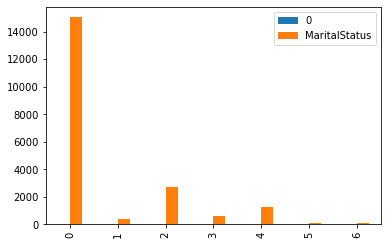

In [39]:
x = pd.concat([pd.Series(np.arange(0,6)),cprfa.MaritalStatus.value_counts()],axis=1).fillna(value=0)
x.plot(kind='bar')

### Sex
The mean is .21 which leans close to 0, so the bulk of the dataset is male.

In [40]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cprfa.Sex_Code.describe(percentiles=pcts)

count    20281.000000
mean         0.219072
std          0.413628
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          0.000000
80%          1.000000
90%          1.000000
max          1.000000
Name: Sex_Code, dtype: float64

In [41]:
cprfa.Sex_Code.value_counts()

0    15838
1     4443
Name: Sex_Code, dtype: int64

<AxesSubplot:>

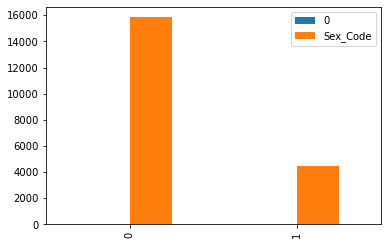

In [42]:
x = pd.concat([pd.Series(np.arange(0,1)),cprfa.Sex_Code.value_counts()],axis=1)
x.plot(kind='bar')

### Age
The mean age is 34 and the 60% percentile is 35. That means around ~59% of the data is at or below the age of 34. The median is 31 so it appears like the data skews younger rather than older.

In [43]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cprfa.age.describe(percentiles=pcts)

count    20281.000000
mean        34.154973
std         12.174682
min         16.000000
10%         21.000000
20%         23.000000
25%         24.000000
30%         26.000000
40%         28.000000
50%         31.000000
60%         35.000000
70%         39.000000
75%         43.000000
80%         46.000000
90%         52.000000
max         95.000000
Name: age, dtype: float64

In [44]:
#24-28 appear the most showing that the data does skew younger
cprfa.age.value_counts()

24    864
23    863
25    861
26    854
22    831
     ... 
84      2
81      2
78      2
80      1
88      1
Name: age, Length: 68, dtype: int64

### Compas Score
The majority of people were categorized as low with 90-95% of people being categorized as low.

In [45]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]
cprfa.Score.describe(percentiles=pcts)

count    20281.000000
mean         0.323505
std          0.605794
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          0.000000
80%          1.000000
90%          1.000000
95%          2.000000
max          2.000000
Name: Score, dtype: float64

In [46]:
cprfa.ScoreText.value_counts()

Low       15222
Medium     3557
High       1502
Name: ScoreText, dtype: int64

<AxesSubplot:>

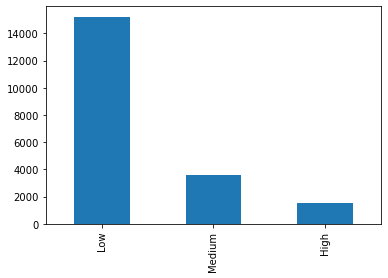

In [47]:
cprfa.ScoreText.value_counts().plot(kind='bar')

## RIsk of Violence

### Marital Status
The bulk of cprfa consists of singles. The mean is below 1(Significant other) and 75% of the dataset is single.

In [48]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cprov.MaritalStatus.describe(percentiles=pcts)

count    20272.000000
mean         0.686415
std          1.288595
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          1.000000
80%          2.000000
90%          3.000000
max          6.000000
Name: MaritalStatus, dtype: float64

<AxesSubplot:>

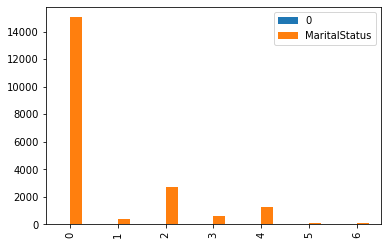

In [75]:
x = pd.concat([pd.Series(np.arange(0,6)),cprov.MaritalStatus.value_counts()],axis=1).fillna(value=0)
x.plot(kind='bar')

### Sex
The mean is .21 which leans close to 0, so the bulk of the dataset is male.

In [50]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cprov.Sex_Code.describe(percentiles=pcts)

count    20272.000000
mean         0.219021
std          0.413593
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          0.000000
80%          1.000000
90%          1.000000
max          1.000000
Name: Sex_Code, dtype: float64

In [51]:
cprov.Sex_Code.value_counts()

0    15832
1     4440
Name: Sex_Code, dtype: int64

<AxesSubplot:>

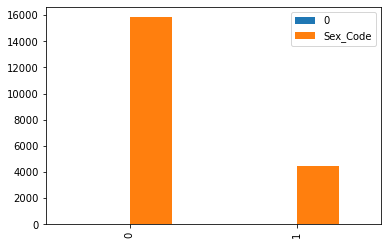

In [52]:
x = pd.concat([pd.Series(np.arange(0,1)),cprov.Sex_Code.value_counts()],axis=1)
x.plot(kind='bar')

### Age
The mean age is 34 and the 60% percentile is 35. That means around ~59% of the data is at or below the age of 34. The median is 31 so it appears like the data skews younger rather than older.

In [53]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cprov.age.describe(percentiles=pcts)

count    20272.000000
mean        34.152970
std         12.173484
min         16.000000
10%         21.000000
20%         23.000000
25%         24.000000
30%         26.000000
40%         28.000000
50%         31.000000
60%         35.000000
70%         39.000000
75%         43.000000
80%         46.000000
90%         52.000000
max         95.000000
Name: age, dtype: float64

In [54]:
#24-28 appear the most showing that the data does skew younger
cprov.age.value_counts()

23    863
24    862
25    861
26    854
22    831
     ... 
84      2
81      2
78      2
80      1
88      1
Name: age, Length: 68, dtype: int64

### Compas Score
The majority of people were categorized as low but only around 70-75% of this time.

In [55]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,]
cprov.Score.describe(percentiles=pcts)

count    20272.000000
mean         0.360497
std          0.629684
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          1.000000
80%          1.000000
90%          1.000000
max          2.000000
Name: Score, dtype: float64

In [56]:
cprov.ScoreText.value_counts()

Low       14646
Medium     3944
High       1682
Name: ScoreText, dtype: int64

<AxesSubplot:>

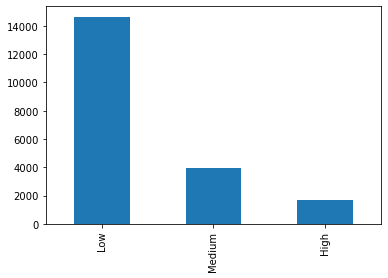

In [57]:
cprov.ScoreText.value_counts().plot(kind='bar')

## RIsk of Recidivism

### Marital Status
The bulk of cprfa consists of singles. The mean is below 1(Significant other) and 75% of the dataset is single.

In [58]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cpror.MaritalStatus.describe(percentiles=pcts)

count    20245.000000
mean         0.686194
std          1.288608
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          1.000000
80%          2.000000
90%          3.000000
max          6.000000
Name: MaritalStatus, dtype: float64

<AxesSubplot:>

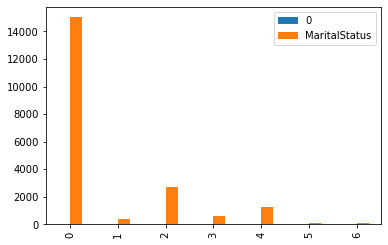

In [59]:
x = pd.concat([pd.Series(np.arange(0,6)),cpror.MaritalStatus.value_counts()],axis=1).fillna(value=0)
x.plot(kind='bar')

### Sex
The mean is .21 which leans close to 0, so the bulk of the dataset is male.

In [60]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cpror.Sex_Code.describe(percentiles=pcts)

count    20245.000000
mean         0.219116
std          0.413658
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
75%          0.000000
80%          1.000000
90%          1.000000
max          1.000000
Name: Sex_Code, dtype: float64

In [61]:
cpror.Sex_Code.value_counts()

0    15809
1     4436
Name: Sex_Code, dtype: int64

<AxesSubplot:>

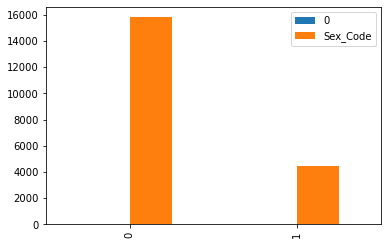

In [62]:
x = pd.concat([pd.Series(np.arange(0,1)),cpror.Sex_Code.value_counts()],axis=1)
x.plot(kind='bar')

### Age
The mean age is 34 and the 60% percentile is 35. That means around ~59% of the data is at or below the age of 34. The median is 31 so it appears like the data skews younger rather than older.

In [63]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
cpror.age.describe(percentiles=pcts)

count    20245.000000
mean        34.149963
std         12.170386
min         16.000000
10%         21.000000
20%         23.000000
25%         24.000000
30%         26.000000
40%         28.000000
50%         31.000000
60%         35.000000
70%         39.000000
75%         43.000000
80%         46.000000
90%         52.000000
max         95.000000
Name: age, dtype: float64

In [64]:
#24-28 appear the most showing that the data does skew younger
cpror.age.value_counts()

25    861
24    861
23    859
26    854
22    830
     ... 
84      2
81      2
78      2
80      1
88      1
Name: age, Length: 68, dtype: int64

### Compas Score
The majority of people were categorized as low but only around 55-60% of this time.

In [65]:
pcts = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,]
cpror.Score.describe(percentiles=pcts)

count    20245.000000
mean         0.605829
std          0.773515
min          0.000000
10%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
75%          1.000000
80%          1.000000
90%          2.000000
max          2.000000
Name: Score, dtype: float64

In [66]:
cpror.ScoreText.value_counts()

Low       11619
Medium     4987
High       3639
Name: ScoreText, dtype: int64

<AxesSubplot:>

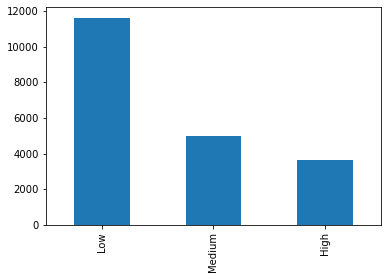

In [67]:
cpror.ScoreText.value_counts().plot(kind='bar')

### other Analysis

In [80]:
pd.crosstab(index = cpror.DecileScore,columns=[cpror.Sex_Code_Text,cpror.MaritalStatus],normalize='columns').sort_index(axis=0,ascending=False).style.format('{:.2%}')

# Models
I'm going to use naive bayes since it allows for classification of more than 2 variables as opposed to logistic regression. The only assumption is that the variable are indepedent but I will just assume that they are. I do it in R cause it's easier.

In [68]:
#cprfa.to_csv('cprfa.csv')
#cpror.to_csv('cpror.csv')
#cprov.to_csv('cprov.csv')